In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import torch

In [3]:
import sys
sys.path.append('..')
from src.utils import (calculate_bs, fix_predictions, plot_brier)
from src.data.dataset import SurvivalDataset

In [4]:
!ls ../data/raw/*.rda

../data/raw/cancer.rda      ../data/raw/reliability.rda
../data/raw/cgd.rda         ../data/raw/retinopathy.rda
../data/raw/diabetic.rda    ../data/raw/rhDNase.rda
../data/raw/flchain.rda     ../data/raw/solder.rda
../data/raw/heart.rda       ../data/raw/survexp.rda
../data/raw/logan.rda       ../data/raw/tobin.rda
../data/raw/nafld.rda       ../data/raw/transplant.rda
../data/raw/nwtco.rda       ../data/raw/udca.rda
../data/raw/pbc.rda


In [5]:
import pyreadr

rda_file_path = '../data/raw/pbc.rda'
data = pyreadr.read_r(rda_file_path)['pbc']
data.head()

,id,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,1,400,2,1,58.765229,f,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,2,4500,0,1,56.446270,f,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,3,1012,2,1,70.072553,m,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,4,1925,2,1,54.740589,f,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,5,1504,1,2,38.105407,f,0,1,1,0.0,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3


In [6]:
data = SurvivalDataset(fname='pbc.rda', path='../data/raw/')
X_train, X_test, y_train, y_test = data.get_tensors()

Succesfully created time tensor of shape: torch.Size([418, 4795])
(334, 769) torch.Size([334, 4795])


In [7]:
from src.models.model import VSpyct

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
model = VSpyct(max_depth=3, bs=64)
model.fit(X_train, y_train)#, clustering_data=torch.cat((X_train, y_train), axis=1))

Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   2%|▏         | 3/150 [00:00<00:18,  7.80it/s]

[iteration 0001] loss: 506097924096.0001
[iteration 0002] loss: 472994409062.4000
[iteration 0003] loss: 431739803033.6000


Epochs:   3%|▎         | 5/150 [00:00<00:14,  9.77it/s]

[iteration 0004] loss: 393795085312.0000
[iteration 0005] loss: 354846809702.4000
[iteration 0006] loss: 330531895500.8000


Epochs:   6%|▌         | 9/150 [00:00<00:12, 11.50it/s]

[iteration 0007] loss: 308902949478.4000
[iteration 0008] loss: 269068183244.8000
[iteration 0009] loss: 251161034854.4000


Epochs:   7%|▋         | 11/150 [00:01<00:11, 11.72it/s]

[iteration 0010] loss: 237588928051.2000
[iteration 0011] loss: 213181432576.0000
[iteration 0012] loss: 192771104307.2000


Epochs:  10%|█         | 15/150 [00:01<00:10, 12.35it/s]

[iteration 0013] loss: 180570925670.4000
[iteration 0014] loss: 163178394764.8000
[iteration 0015] loss: 145421408409.6000


Epochs:  11%|█▏        | 17/150 [00:01<00:10, 12.70it/s]

[iteration 0016] loss: 141048530688.0000
[iteration 0017] loss: 128038029139.2000
[iteration 0018] loss: 119332163408.0000


Epochs:  14%|█▍        | 21/150 [00:01<00:10, 12.69it/s]

[iteration 0019] loss: 113428308174.2000
[iteration 0020] loss: 104267557376.8000
[iteration 0021] loss: 100580471679.6000


Epochs:  15%|█▌        | 23/150 [00:01<00:09, 12.81it/s]

[iteration 0022] loss: 94447975290.8000
[iteration 0023] loss: 89042574133.7875
[iteration 0024] loss: 81357100539.7622


Epochs:  18%|█▊        | 27/150 [00:02<00:09, 13.06it/s]

[iteration 0025] loss: 77346183580.8000
[iteration 0026] loss: 77617773338.4000
[iteration 0027] loss: 73138947141.5000


Epochs:  19%|█▉        | 29/150 [00:02<00:09, 12.90it/s]

[iteration 0028] loss: 69955704673.3500
[iteration 0029] loss: 66311947073.3984
[iteration 0030] loss: 63950814208.6000


Epochs:  22%|██▏       | 33/150 [00:02<00:08, 13.18it/s]

[iteration 0031] loss: 60690158033.3750
[iteration 0032] loss: 60997431661.1000
[iteration 0033] loss: 58038522715.4875


Epochs:  23%|██▎       | 35/150 [00:02<00:08, 13.30it/s]

[iteration 0034] loss: 56577804497.7516
[iteration 0035] loss: 54765253347.0656
[iteration 0036] loss: 53615529680.9594


Epochs:  26%|██▌       | 39/150 [00:03<00:08, 13.45it/s]

[iteration 0037] loss: 51933490892.0500
[iteration 0038] loss: 50082700375.4500
[iteration 0039] loss: 50352189629.2414


Epochs:  27%|██▋       | 41/150 [00:03<00:08, 13.49it/s]

[iteration 0040] loss: 49901204576.1023
[iteration 0041] loss: 50062846385.8063
[iteration 0042] loss: 48657594735.1985


Epochs:  30%|███       | 45/150 [00:03<00:07, 13.22it/s]

[iteration 0043] loss: 48976270722.4234
[iteration 0044] loss: 46954819823.9340
[iteration 0045] loss: 49497996162.7687


Epochs:  31%|███       | 46/150 [00:03<00:08, 12.13it/s]


[iteration 0046] loss: 47655070618.5563
Early stopping at epoch 46.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 459877428428.8000
[iteration 0002] loss: 453587044761.6000


Epochs:   4%|▍         | 6/150 [00:00<00:05, 27.05it/s]

[iteration 0003] loss: 431268326604.8000
[iteration 0004] loss: 417860243456.0000
[iteration 0005] loss: 402744867225.6000
[iteration 0006] loss: 401995695718.4000
[iteration 0007] loss: 377274920140.8000
[iteration 0008] loss: 371746331852.8000


Epochs:   8%|▊         | 12/150 [00:00<00:05, 26.47it/s]

[iteration 0009] loss: 354075832320.0000
[iteration 0010] loss: 342138599014.4000
[iteration 0011] loss: 336153775308.8000
[iteration 0012] loss: 322504502067.2000
[iteration 0013] loss: 319937934540.8000
[iteration 0014] loss: 299540036403.2000


Epochs:  12%|█▏        | 18/150 [00:00<00:04, 26.46it/s]

[iteration 0015] loss: 294515378585.6000
[iteration 0016] loss: 283071521996.8000
[iteration 0017] loss: 275159152230.4000
[iteration 0018] loss: 263767844454.4000
[iteration 0019] loss: 255055020441.5999
[iteration 0020] loss: 249676028313.6000


Epochs:  16%|█▌        | 24/150 [00:00<00:04, 26.25it/s]

[iteration 0021] loss: 247569235968.0000
[iteration 0022] loss: 235868720947.2000
[iteration 0023] loss: 230556556902.4000
[iteration 0024] loss: 219619709542.4000
[iteration 0025] loss: 215036175564.8000
[iteration 0026] loss: 204656390963.2000


Epochs:  20%|██        | 30/150 [00:01<00:04, 26.44it/s]

[iteration 0027] loss: 202611601408.0000
[iteration 0028] loss: 194469072691.2000
[iteration 0029] loss: 190582528204.8000
[iteration 0030] loss: 188970716364.8000
[iteration 0031] loss: 179321576038.4000


Epochs:  22%|██▏       | 33/150 [00:01<00:04, 23.81it/s]

[iteration 0032] loss: 173352026931.2000
[iteration 0033] loss: 169159967948.8000
[iteration 0034] loss: 163678705664.0000
[iteration 0035] loss: 161465903923.2000


Epochs:  24%|██▍       | 36/150 [00:01<00:04, 24.44it/s]

[iteration 0036] loss: 157195808153.6000
[iteration 0037] loss: 151737298944.0000


Epochs:  26%|██▌       | 39/150 [00:01<00:04, 24.76it/s]

[iteration 0038] loss: 144940300288.0000
[iteration 0039] loss: 140177144115.2000
[iteration 0040] loss: 138194030694.4000
[iteration 0041] loss: 131692121395.2000


Epochs:  28%|██▊       | 42/150 [00:01<00:04, 24.89it/s]

[iteration 0042] loss: 132006516633.6000
[iteration 0043] loss: 123762003763.2000


Epochs:  30%|███       | 45/150 [00:01<00:04, 23.95it/s]

[iteration 0044] loss: 125979060838.4000
[iteration 0045] loss: 122096417996.8000
[iteration 0046] loss: 115981204121.6000


Epochs:  32%|███▏      | 48/150 [00:01<00:04, 23.37it/s]

[iteration 0047] loss: 112081911398.4000
[iteration 0048] loss: 111611494553.6000


Epochs:  34%|███▍      | 51/150 [00:02<00:04, 24.02it/s]

[iteration 0049] loss: 107464712908.8000
[iteration 0050] loss: 106224855859.2000
[iteration 0051] loss: 101391534233.6000
[iteration 0052] loss: 100428575641.6000


Epochs:  36%|███▌      | 54/150 [00:02<00:03, 24.09it/s]

[iteration 0053] loss: 97239981363.2000
[iteration 0054] loss: 96437344230.4000


Epochs:  38%|███▊      | 57/150 [00:02<00:03, 24.57it/s]

[iteration 0055] loss: 92910671692.8000
[iteration 0056] loss: 90028482432.0000
[iteration 0057] loss: 86296405657.6000
[iteration 0058] loss: 83931723059.2000
[iteration 0059] loss: 85695346227.2000


Epochs:  42%|████▏     | 63/150 [00:02<00:03, 23.90it/s]

[iteration 0060] loss: 81389087360.0000
[iteration 0061] loss: 81180926028.8000
[iteration 0062] loss: 76228342604.8000
[iteration 0063] loss: 78324304294.4000
[iteration 0064] loss: 76128695513.6000


Epochs:  44%|████▍     | 66/150 [00:02<00:03, 22.91it/s]

[iteration 0065] loss: 72728741363.2000
[iteration 0066] loss: 74724851443.2000
[iteration 0067] loss: 69485454220.8000
[iteration 0068] loss: 68364950163.2000


Epochs:  46%|████▌     | 69/150 [00:02<00:03, 23.86it/s]

[iteration 0069] loss: 67326287715.2000


Epochs:  48%|████▊     | 72/150 [00:02<00:03, 24.33it/s]

[iteration 0070] loss: 66842960345.6000
[iteration 0071] loss: 64691111923.2000
[iteration 0072] loss: 61925520112.0000
[iteration 0073] loss: 62361679297.6000
[iteration 0074] loss: 60831120300.8000


Epochs:  50%|█████     | 75/150 [00:03<00:03, 24.81it/s]

[iteration 0075] loss: 59151152269.6000


Epochs:  52%|█████▏    | 78/150 [00:03<00:02, 25.15it/s]

[iteration 0076] loss: 57745497201.6000
[iteration 0077] loss: 58363479116.8000
[iteration 0078] loss: 56445861860.0000
[iteration 0079] loss: 55554799994.3500
[iteration 0080] loss: 54488596246.8000


Epochs:  54%|█████▍    | 81/150 [00:03<00:02, 25.13it/s]

[iteration 0081] loss: 52816538089.0500


Epochs:  56%|█████▌    | 84/150 [00:03<00:02, 24.59it/s]

[iteration 0082] loss: 52973078329.6000
[iteration 0083] loss: 51403016260.1750
[iteration 0084] loss: 50771136764.3000
[iteration 0085] loss: 49358846690.6000
[iteration 0086] loss: 48291495763.4406


Epochs:  60%|██████    | 90/150 [00:03<00:02, 25.25it/s]

[iteration 0087] loss: 49562674465.0000
[iteration 0088] loss: 47236883063.8625
[iteration 0089] loss: 47359243269.7000
[iteration 0090] loss: 45394121258.3500
[iteration 0091] loss: 44698206623.1625
[iteration 0092] loss: 44793718489.4528


Epochs:  64%|██████▍   | 96/150 [00:03<00:02, 25.13it/s]

[iteration 0093] loss: 44681227154.4703
[iteration 0094] loss: 43460152197.2000
[iteration 0095] loss: 43254011371.8375
[iteration 0096] loss: 42516668888.6750
[iteration 0097] loss: 41446540548.9500


Epochs:  68%|██████▊   | 102/150 [00:04<00:01, 25.30it/s]

[iteration 0098] loss: 41140976848.8000
[iteration 0099] loss: 41769871241.2625
[iteration 0100] loss: 39176758845.6000
[iteration 0101] loss: 40078077745.8750
[iteration 0102] loss: 38741199898.0000
[iteration 0103] loss: 38611652297.6000


Epochs:  72%|███████▏  | 108/150 [00:04<00:01, 25.65it/s]

[iteration 0104] loss: 39435764120.6003
[iteration 0105] loss: 37381996374.4000
[iteration 0106] loss: 37188644308.8750
[iteration 0107] loss: 36144466766.4000
[iteration 0108] loss: 36808100234.4000
[iteration 0109] loss: 35520295208.2594


Epochs:  76%|███████▌  | 114/150 [00:04<00:01, 26.08it/s]

[iteration 0110] loss: 37295304004.8000
[iteration 0111] loss: 35101658726.4000
[iteration 0112] loss: 36134972838.4000
[iteration 0113] loss: 37172905520.0000
[iteration 0114] loss: 34167394272.0000
[iteration 0115] loss: 34543656864.0000


Epochs:  80%|████████  | 120/150 [00:04<00:01, 26.24it/s]

[iteration 0116] loss: 34595737140.8000
[iteration 0117] loss: 32716641068.8000
[iteration 0118] loss: 34922396128.0000
[iteration 0119] loss: 32642781500.8000
[iteration 0120] loss: 33676380102.4000
[iteration 0121] loss: 31668415638.4000


Epochs:  84%|████████▍ | 126/150 [00:05<00:00, 26.42it/s]

[iteration 0122] loss: 32612040262.4000
[iteration 0123] loss: 33260132256.0000
[iteration 0124] loss: 30570194057.6000
[iteration 0125] loss: 29817855833.6000
[iteration 0126] loss: 30483376089.6000
[iteration 0127] loss: 30450654969.6000


Epochs:  85%|████████▍ | 127/150 [00:05<00:00, 24.98it/s]


Early stopping at epoch 127.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   3%|▎         | 4/150 [00:00<00:03, 39.67it/s]

[iteration 0001] loss: 236210439782.4000
[iteration 0002] loss: 234350443724.8000
[iteration 0003] loss: 219545905561.6000
[iteration 0004] loss: 215693532364.8000
[iteration 0005] loss: 211326013440.0000
[iteration 0006] loss: 202966885171.2000
[iteration 0007] loss: 203602240307.2000


Epochs:   6%|▌         | 9/150 [00:00<00:03, 40.26it/s]

[iteration 0008] loss: 197965597900.8000
[iteration 0009] loss: 189787752857.6000


Epochs:   9%|▉         | 14/150 [00:00<00:03, 40.56it/s]

[iteration 0010] loss: 191238215270.4000
[iteration 0011] loss: 183414817587.2000
[iteration 0012] loss: 185255290470.4000
[iteration 0013] loss: 176903652966.4000
[iteration 0014] loss: 180084282982.4000
[iteration 0015] loss: 171150122188.8000
[iteration 0016] loss: 163571553075.2000
[iteration 0017] loss: 159435005132.8000
[iteration 0018] loss: 159314429132.8000


Epochs:  16%|█▌        | 24/150 [00:00<00:03, 40.51it/s]

[iteration 0019] loss: 161100704153.6000
[iteration 0020] loss: 153342436966.4000
[iteration 0021] loss: 149795417702.4000
[iteration 0022] loss: 146341221171.2000
[iteration 0023] loss: 143478170419.2000
[iteration 0024] loss: 138420392345.6000
[iteration 0025] loss: 136695540121.6000
[iteration 0026] loss: 131765059584.0000
[iteration 0027] loss: 129462307225.6000


Epochs:  19%|█▉        | 29/150 [00:00<00:03, 40.20it/s]

[iteration 0028] loss: 127259559526.4000
[iteration 0029] loss: 120904257945.6000
[iteration 0030] loss: 126347010867.2000
[iteration 0031] loss: 114263006822.4000
[iteration 0032] loss: 116496835379.2000
[iteration 0033] loss: 112995076915.2000


Epochs:  23%|██▎       | 34/150 [00:00<00:02, 40.48it/s]

[iteration 0034] loss: 113488720691.2000
[iteration 0035] loss: 107420419072.0000
[iteration 0036] loss: 109491330662.4000


Epochs:  26%|██▌       | 39/150 [00:00<00:02, 40.23it/s]

[iteration 0037] loss: 104188978176.0000
[iteration 0038] loss: 104492893593.6000
[iteration 0039] loss: 103467522457.6000
[iteration 0040] loss: 98720324608.0000
[iteration 0041] loss: 97658189414.4000
[iteration 0042] loss: 98799047680.0000


Epochs:  29%|██▉       | 44/150 [00:01<00:02, 39.11it/s]

[iteration 0043] loss: 93720071372.8000
[iteration 0044] loss: 95076643635.2000


Epochs:  32%|███▏      | 48/150 [00:01<00:02, 38.63it/s]

[iteration 0045] loss: 90535889305.6000
[iteration 0046] loss: 87139516211.2000
[iteration 0047] loss: 85761674240.0000
[iteration 0048] loss: 84330396876.8000
[iteration 0049] loss: 82057884262.4000
[iteration 0050] loss: 83545444556.8000


Epochs:  35%|███▍      | 52/150 [00:01<00:02, 37.45it/s]

[iteration 0051] loss: 78573499187.2000
[iteration 0052] loss: 78218616627.2000


Epochs:  38%|███▊      | 57/150 [00:01<00:02, 38.13it/s]

[iteration 0053] loss: 77837920563.2000
[iteration 0054] loss: 74132605337.6000
[iteration 0055] loss: 71266543104.0000
[iteration 0056] loss: 70804271616.0000
[iteration 0057] loss: 71523267072.0000
[iteration 0058] loss: 67970908569.6000
[iteration 0059] loss: 67182302412.8000
[iteration 0060] loss: 66620994764.8000


Epochs:  44%|████▍     | 66/150 [00:01<00:02, 39.25it/s]

[iteration 0061] loss: 64959263539.2000
[iteration 0062] loss: 62256058060.8000
[iteration 0063] loss: 63594038681.6000
[iteration 0064] loss: 62577135513.6000
[iteration 0065] loss: 60484809932.8000
[iteration 0066] loss: 58798033868.8000
[iteration 0067] loss: 57065990553.6000
[iteration 0068] loss: 57080026316.8000
[iteration 0069] loss: 56445829632.0000


Epochs:  50%|█████     | 75/150 [00:01<00:01, 39.94it/s]

[iteration 0070] loss: 55286207180.8000
[iteration 0071] loss: 55368735590.4000
[iteration 0072] loss: 52020792576.0000
[iteration 0073] loss: 53969400576.0000
[iteration 0074] loss: 52237778892.8000
[iteration 0075] loss: 51590815641.6000
[iteration 0076] loss: 51134370560.0000
[iteration 0077] loss: 49429727180.8000
[iteration 0078] loss: 49543407974.4000


Epochs:  56%|█████▌    | 84/150 [00:02<00:01, 40.43it/s]

[iteration 0079] loss: 47843442841.6000
[iteration 0080] loss: 47674667545.6000
[iteration 0081] loss: 45536293171.2000
[iteration 0082] loss: 45999333939.2000
[iteration 0083] loss: 44498180812.8000
[iteration 0084] loss: 44069244006.4000
[iteration 0085] loss: 42370117580.8000
[iteration 0086] loss: 44591137740.8000
[iteration 0087] loss: 41797110451.2000


Epochs:  59%|█████▉    | 89/150 [00:02<00:01, 40.15it/s]

[iteration 0088] loss: 42101366451.2000
[iteration 0089] loss: 41761505689.6000
[iteration 0090] loss: 40985297766.4000
[iteration 0091] loss: 39716340608.0000
[iteration 0092] loss: 39170558566.4000
[iteration 0093] loss: 39162162355.2000


Epochs:  63%|██████▎   | 94/150 [00:02<00:01, 40.48it/s]

[iteration 0094] loss: 38201142374.4000
[iteration 0095] loss: 38210708275.2000
[iteration 0096] loss: 37136460620.8000


Epochs:  66%|██████▌   | 99/150 [00:02<00:01, 40.38it/s]

[iteration 0097] loss: 35601227136.0000
[iteration 0098] loss: 35370257382.4000
[iteration 0099] loss: 36846229248.0000
[iteration 0100] loss: 36460595481.6000
[iteration 0101] loss: 34233255910.4000
[iteration 0102] loss: 32879550016.0000
[iteration 0103] loss: 34394112441.6000


Epochs:  69%|██████▉   | 104/150 [00:02<00:01, 38.81it/s]


[iteration 0104] loss: 34908767795.2000
Early stopping at epoch 104.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   3%|▎         | 5/150 [00:00<00:03, 44.19it/s]

[iteration 0001] loss: 199549006028.8000
[iteration 0002] loss: 192258239078.4000
[iteration 0003] loss: 191591877836.8000
[iteration 0004] loss: 187646202880.0000
[iteration 0005] loss: 182875631615.9999
[iteration 0006] loss: 178938903961.6000
[iteration 0007] loss: 171605550284.8000
[iteration 0008] loss: 172529616281.6000
[iteration 0009] loss: 172091974246.4000


Epochs:   7%|▋         | 10/150 [00:00<00:03, 43.83it/s]

[iteration 0010] loss: 162664975769.6000
[iteration 0011] loss: 165149880934.4000
[iteration 0012] loss: 163809627545.6000
[iteration 0013] loss: 150659312435.2000
[iteration 0014] loss: 155735278592.0000


Epochs:  10%|█         | 15/150 [00:00<00:03, 44.38it/s]

[iteration 0015] loss: 151653611315.2000
[iteration 0016] loss: 142492027699.2000
[iteration 0017] loss: 145700397260.8000
[iteration 0018] loss: 144103703142.4000


Epochs:  13%|█▎        | 20/150 [00:00<00:02, 44.05it/s]

[iteration 0019] loss: 141765126758.4000
[iteration 0020] loss: 139537074790.4000
[iteration 0021] loss: 134021247385.6000
[iteration 0022] loss: 138111553126.4000
[iteration 0023] loss: 129477704294.4000


Epochs:  17%|█▋        | 25/150 [00:00<00:02, 44.12it/s]

[iteration 0024] loss: 129487804620.8000
[iteration 0025] loss: 126253819289.6000
[iteration 0026] loss: 126250140876.8000
[iteration 0027] loss: 123377185587.2000


Epochs:  20%|██        | 30/150 [00:00<00:02, 43.62it/s]

[iteration 0028] loss: 124430685184.0000
[iteration 0029] loss: 119812589158.4000
[iteration 0030] loss: 117676772761.6000
[iteration 0031] loss: 113621022515.2000
[iteration 0032] loss: 110781585203.2000
[iteration 0033] loss: 112464440320.0000
[iteration 0034] loss: 108578295808.0000


Epochs:  23%|██▎       | 35/150 [00:00<00:02, 43.66it/s]

[iteration 0035] loss: 106047053619.2000
[iteration 0036] loss: 102240083353.6000


Epochs:  27%|██▋       | 40/150 [00:00<00:02, 43.63it/s]

[iteration 0037] loss: 104582843596.8000
[iteration 0038] loss: 99079746662.4000
[iteration 0039] loss: 100035956224.0000
[iteration 0040] loss: 99151649996.8000
[iteration 0041] loss: 96231683379.2000
[iteration 0042] loss: 92671099904.0000
[iteration 0043] loss: 90283787366.4000


Epochs:  30%|███       | 45/150 [00:01<00:02, 43.51it/s]

[iteration 0044] loss: 89300970393.6000
[iteration 0045] loss: 87471646720.0000


Epochs:  33%|███▎      | 50/150 [00:01<00:02, 43.60it/s]

[iteration 0046] loss: 89255489228.8000
[iteration 0047] loss: 87106083840.0000
[iteration 0048] loss: 85328950886.4000
[iteration 0049] loss: 81203926220.8000
[iteration 0050] loss: 82741102080.0000
[iteration 0051] loss: 79441023897.6000
[iteration 0052] loss: 79411077222.4000
[iteration 0053] loss: 77919326003.2000
[iteration 0054] loss: 77704680140.8000


Epochs:  37%|███▋      | 55/150 [00:01<00:02, 43.51it/s]

[iteration 0055] loss: 75805391667.2000
[iteration 0056] loss: 74048604364.8000
[iteration 0057] loss: 73088192204.8000
[iteration 0058] loss: 70482501632.0000
[iteration 0059] loss: 72621379379.2000


Epochs:  40%|████      | 60/150 [00:01<00:02, 43.82it/s]

[iteration 0060] loss: 69512794521.6000
[iteration 0061] loss: 68844375552.0000
[iteration 0062] loss: 68764677632.0000
[iteration 0063] loss: 67588468019.2000


Epochs:  43%|████▎     | 65/150 [00:01<00:01, 43.48it/s]

[iteration 0064] loss: 63042245324.8000
[iteration 0065] loss: 62201000140.8000
[iteration 0066] loss: 63215320064.0000
[iteration 0067] loss: 60255221452.8000
[iteration 0068] loss: 59748197888.0000


Epochs:  47%|████▋     | 70/150 [00:01<00:01, 43.52it/s]

[iteration 0069] loss: 62283967897.6000
[iteration 0070] loss: 56990770688.0000
[iteration 0071] loss: 58083580825.6000
[iteration 0072] loss: 54946903244.8000


Epochs:  50%|█████     | 75/150 [00:01<00:01, 43.03it/s]

[iteration 0073] loss: 53078208512.0000
[iteration 0074] loss: 56192073625.6000
[iteration 0075] loss: 52972058624.0000
[iteration 0076] loss: 52907155763.2000
[iteration 0077] loss: 53008405094.4000
[iteration 0078] loss: 49087801344.0000
[iteration 0079] loss: 51345086361.6000


Epochs:  53%|█████▎    | 80/150 [00:01<00:01, 42.88it/s]

[iteration 0080] loss: 48746245222.4000
[iteration 0081] loss: 47911823257.6000


Epochs:  57%|█████▋    | 85/150 [00:01<00:01, 42.83it/s]

[iteration 0082] loss: 46338199654.4000
[iteration 0083] loss: 48692363571.2000
[iteration 0084] loss: 47696307507.2000
[iteration 0085] loss: 43474193612.8000
[iteration 0086] loss: 43733336268.8000
[iteration 0087] loss: 43342284492.8000
[iteration 0088] loss: 42420767846.4000


Epochs:  60%|██████    | 90/150 [00:02<00:01, 42.69it/s]

[iteration 0089] loss: 43896875827.2000
[iteration 0090] loss: 41812301926.4000


Epochs:  63%|██████▎   | 95/150 [00:02<00:01, 42.69it/s]

[iteration 0091] loss: 42106319257.6000
[iteration 0092] loss: 42904901836.8000
[iteration 0093] loss: 40189944012.8000
[iteration 0094] loss: 40179671654.4000
[iteration 0095] loss: 38565527756.8000
[iteration 0096] loss: 38262706790.4000
[iteration 0097] loss: 39469456281.6000
[iteration 0098] loss: 36873716838.4000
[iteration 0099] loss: 36397450547.2000


Epochs:  67%|██████▋   | 100/150 [00:02<00:01, 42.67it/s]

[iteration 0100] loss: 35486893875.2000
[iteration 0101] loss: 37442801459.2000
[iteration 0102] loss: 36316128460.8000
[iteration 0103] loss: 34367056691.2000
[iteration 0104] loss: 33981726515.2000


Epochs:  70%|███████   | 105/150 [00:02<00:01, 42.97it/s]

[iteration 0105] loss: 33746001920.0000
[iteration 0106] loss: 33932425318.4000
[iteration 0107] loss: 32184433459.2000
[iteration 0108] loss: 31268849971.2000


Epochs:  73%|███████▎  | 110/150 [00:02<00:00, 42.75it/s]

[iteration 0109] loss: 29856680960.0000
[iteration 0110] loss: 31627646668.8000
[iteration 0111] loss: 31471384473.6000
[iteration 0112] loss: 29573393715.2000
[iteration 0113] loss: 30263715635.2000


Epochs:  77%|███████▋  | 115/150 [00:02<00:00, 43.08it/s]

[iteration 0114] loss: 28542696243.2000
[iteration 0115] loss: 29421019340.8000


Epochs:  77%|███████▋  | 116/150 [00:02<00:00, 42.91it/s]


[iteration 0116] loss: 28797788979.2000
Early stopping at epoch 116.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   2%|▏         | 3/150 [00:00<00:05, 24.79it/s]

[iteration 0001] loss: 94783300761.6000
[iteration 0002] loss: 88538930649.6000
[iteration 0003] loss: 84239279616.0000
[iteration 0004] loss: 76675478182.4000


Epochs:   4%|▍         | 6/150 [00:00<00:05, 24.64it/s]

[iteration 0005] loss: 75285250764.8000
[iteration 0006] loss: 67487586419.2000


Epochs:   6%|▌         | 9/150 [00:00<00:05, 25.14it/s]

[iteration 0007] loss: 65708374533.2000
[iteration 0008] loss: 57426260644.6000
[iteration 0009] loss: 55972241339.6000
[iteration 0010] loss: 52651953527.5500


Epochs:   8%|▊         | 12/150 [00:00<00:05, 24.92it/s]

[iteration 0011] loss: 48400613137.5332
[iteration 0012] loss: 42273048232.6562


Epochs:  10%|█         | 15/150 [00:00<00:05, 25.19it/s]

[iteration 0013] loss: 44280612114.5000
[iteration 0014] loss: 41335348991.1016
[iteration 0015] loss: 37350890158.2000
[iteration 0016] loss: 37480535302.7656


Epochs:  12%|█▏        | 18/150 [00:00<00:05, 25.10it/s]

[iteration 0017] loss: 33318228065.6000
[iteration 0018] loss: 33339686233.6000


Epochs:  14%|█▍        | 21/150 [00:00<00:05, 25.30it/s]

[iteration 0019] loss: 30487018268.8000
[iteration 0020] loss: 28064407443.2000
[iteration 0021] loss: 26535452604.8000
[iteration 0022] loss: 26621960027.2000


Epochs:  16%|█▌        | 24/150 [00:00<00:05, 25.20it/s]

[iteration 0023] loss: 25786738227.2000
[iteration 0024] loss: 26721885721.6000


Epochs:  18%|█▊        | 27/150 [00:01<00:04, 25.37it/s]

[iteration 0025] loss: 22765961190.4000
[iteration 0026] loss: 22672943641.6000
[iteration 0027] loss: 21915687424.0000
[iteration 0028] loss: 19663054252.8000


Epochs:  20%|██        | 30/150 [00:01<00:04, 25.17it/s]

[iteration 0029] loss: 21379569075.2000
[iteration 0030] loss: 20312805760.0000


Epochs:  20%|██        | 30/150 [00:01<00:04, 24.29it/s]


Early stopping at epoch 30.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   2%|▏         | 3/150 [00:00<00:02, 53.45it/s]


[iteration 0001] loss: 57516314624.0000
[iteration 0002] loss: 60297714073.6000
[iteration 0003] loss: 60941060096.0000
Early stopping at epoch 3.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 52657904025.6000


Epochs:   3%|▎         | 4/150 [00:00<00:04, 35.98it/s]

[iteration 0002] loss: 47814953881.6000
[iteration 0003] loss: 45227305113.6000
[iteration 0004] loss: 45302517760.0000
[iteration 0005] loss: 40804395571.2000


Epochs:   5%|▌         | 8/150 [00:00<00:03, 36.05it/s]

[iteration 0006] loss: 38970459776.0000
[iteration 0007] loss: 36758506649.6000
[iteration 0008] loss: 34738002099.2000
[iteration 0009] loss: 32328874470.4000


Epochs:   8%|▊         | 12/150 [00:00<00:03, 36.22it/s]

[iteration 0010] loss: 32344936294.4000
[iteration 0011] loss: 29506922880.0000
[iteration 0012] loss: 27458602649.6000
[iteration 0013] loss: 25209539097.6000


Epochs:  11%|█         | 16/150 [00:00<00:03, 36.28it/s]

[iteration 0014] loss: 22863103526.4000
[iteration 0015] loss: 23805054918.4000
[iteration 0016] loss: 20470678556.8000
[iteration 0017] loss: 20238092076.8000
[iteration 0018] loss: 16455210131.2000
[iteration 0019] loss: 17405704809.6000


Epochs:  13%|█▎        | 20/150 [00:00<00:03, 35.08it/s]

[iteration 0020] loss: 16777000217.6000


Epochs:  16%|█▌        | 24/150 [00:00<00:03, 35.66it/s]

[iteration 0021] loss: 14159605076.0000
[iteration 0022] loss: 14420828500.0000
[iteration 0023] loss: 13596438196.8000
[iteration 0024] loss: 13685281742.0082
[iteration 0025] loss: 11007360460.8000
[iteration 0026] loss: 10261789216.0000
[iteration 0027] loss: 11718685532.0000


Epochs:  19%|█▊        | 28/150 [00:00<00:03, 35.87it/s]

[iteration 0028] loss: 11006151948.0000


Epochs:  19%|█▊        | 28/150 [00:00<00:03, 34.53it/s]

Early stopping at epoch 28.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


In [9]:
preds = model.predict(X_test)

In [10]:
preds.shape

torch.Size([84, 30, 4795])

In [14]:
from spyct import Model

In [15]:
spyct_model_onetree = Model(num_trees=1)
spyct_model_onetree.fit(X_train.numpy(), y_train.numpy())
preds_spyct_onetree = spyct_model_onetree.predict(X_test.numpy())

In [16]:
spyct_model = Model()
spyct_model.fit(X_train.numpy(), y_train.numpy())
preds_spyct = spyct_model.predict(X_test.numpy())

In [30]:
torch.nansum(y_test[i]).item()

1191.0

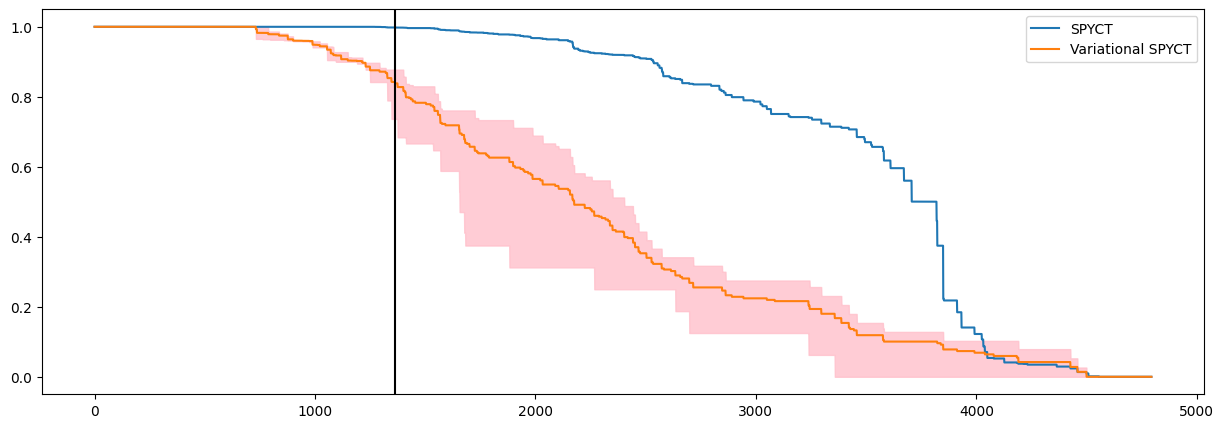

In [42]:
i = 33
plt.figure(figsize=(15,5))
plt.plot(preds_spyct[i, :], label='SPYCT')
plt.plot(preds[i, :, :].mean(axis=0), label='Variational SPYCT')

percentiles_10 = torch.quantile(preds[i, :, :], 0.1, axis=0)
percentiles_90 = torch.quantile(preds[i, :, :], 0.9, axis=0)

plt.fill_between(range(preds.shape[-1]), percentiles_10, percentiles_90, color='pink', alpha=0.8)

plt.axvline(torch.nansum(y_test[i]).item(), color='black')

plt.legend()

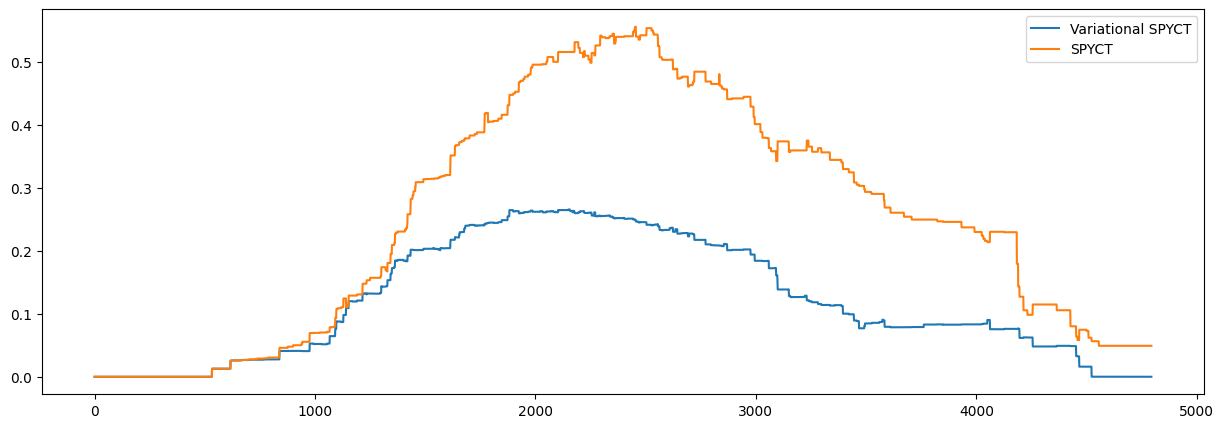

In [19]:
plot_brier(preds, preds_spyct_onetree, y_test)

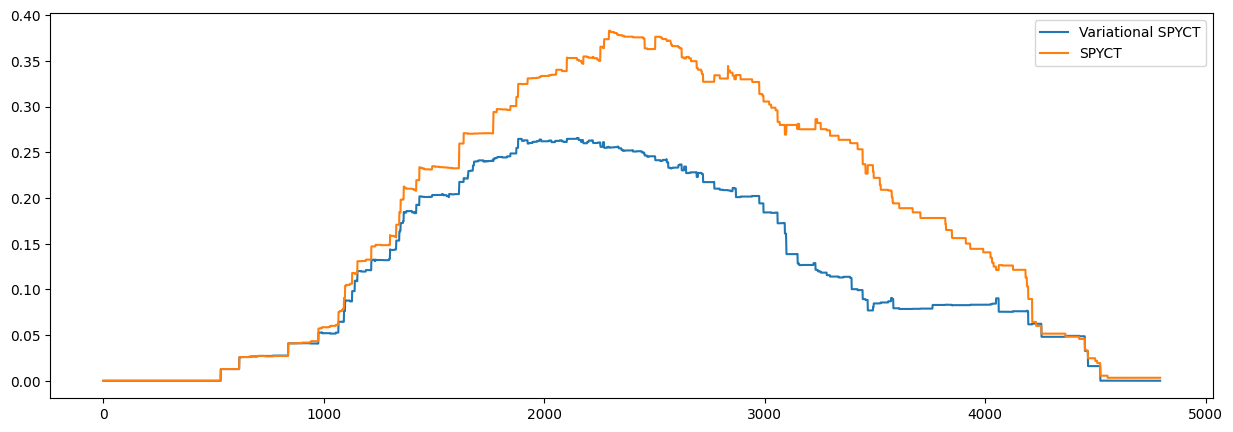

In [20]:
plot_brier(preds, preds_spyct, y_test)

In [17]:
X_train, T_train, E_train, X_test, T_test, E_test = data.pysurvival_split()

In [18]:
from pysurvival.models.semi_parametric import CoxPHModel

coxph = CoxPHModel()
coxph.fit(X_train, T_train, E_train, lr=0.01, l2_reg=1e-2, init_method='zeros')

Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 714.551 - ||grad||^2 = 404.22307
 * Iteration #2 - Loss = 698.182 - ||grad||^2 = 399.76632
 * Iteration #3 - Loss = 688.456 - ||grad||^2 = 395.63918
 * Iteration #4 - Loss = 679.989 - ||grad||^2 = 391.58569
 * Iteration #5 - Loss = 672.359 - ||grad||^2 = 387.59254
 * Iteration #6 - Loss = 665.347 - ||grad||^2 = 383.65324
 * Iteration #7 - Loss = 658.821 - ||grad||^2 = 379.76382
 * Iteration #8 - Loss = 652.692 - ||grad||^2 = 375.92157
 * Iteration #9 - Loss = 646.897 - ||grad||^2 = 372.12447
 * Iteration #10 - Loss = 641.387 - ||grad||^2 = 368.37093
 * Iteration #11 - Loss = 636.125 - ||grad||^2 = 364.65965
 * Iteration #12 - Loss = 631.082 - ||grad||^2 = 360.98954
 * Iteration #13 - Loss = 626.233 - ||grad||^2 = 357.35965
 * Iteration #14 - Loss = 621.560 - ||grad||^2 = 353.76914
 * Iteration #15 - Loss = 617.044 - ||grad||^2 = 350.21724
 * Iteration #16 - Loss = 612.672 - ||grad||^2 = 346.70326
 * Iteration #17 - Loss = 

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/pysurvival/models/semi_parametric.py:49: RuntimeWarning: divide by zero encountered in divide
  self.std_err  = np.sqrt(self.inv_Hessian.diagonal())/self.std_scale


CoxPHModel

In [19]:
times = coxph.times
print(times)

[  41.   51.   71.   77.   94.  110.  130.  131.  140.  179.  186.  191.
  198.  216.  223.  249.  264.  304.  321.  326.  334.  359.  388.  400.
  460.  466.  489.  515.  549.  552.  559.  597.  611.  681.  708.  727.
  733.  750.  762.  778.  785.  786.  790.  791.  797.  799.  824.  850.
  853.  859.  890.  904.  930.  935.  943.  971.  974.  980.  990.  999.
 1000. 1012. 1037. 1077. 1080. 1083. 1095. 1152. 1165. 1168. 1170. 1191.
 1197. 1212. 1217. 1350. 1356. 1413. 1427. 1434. 1444. 1462. 1478. 1487.
 1518. 1536. 1576. 1616. 1657. 1682. 1690. 1741. 1746. 1786. 1827. 1925.
 2011. 2071. 2090. 2105. 2111. 2224. 2256. 2286. 2288. 2297. 2386. 2400.
 2419. 2466. 2503. 2540. 2583. 2598. 2689. 2769. 2796. 2812. 2847. 3086.
 3090. 3170. 3222. 3244. 3358. 3428. 3445. 3561. 3574. 3762. 3839. 3853.
 4079. 4191.]


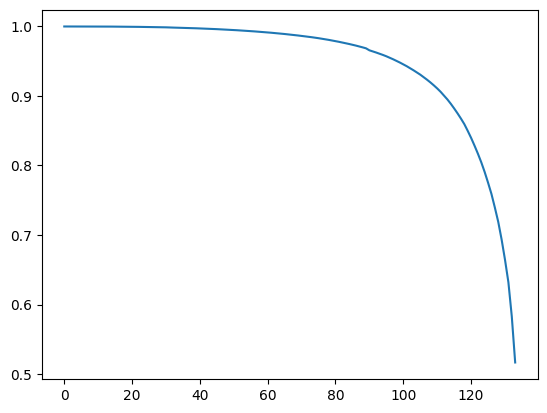

In [20]:
predicted = coxph.predict_survival(X_test)
plt.plot(predicted[5])

In [21]:
transformed_predictions = fix_predictions(predicted, times, int(T_train.max()))
transformed_predictions.shape

(84, 4795)

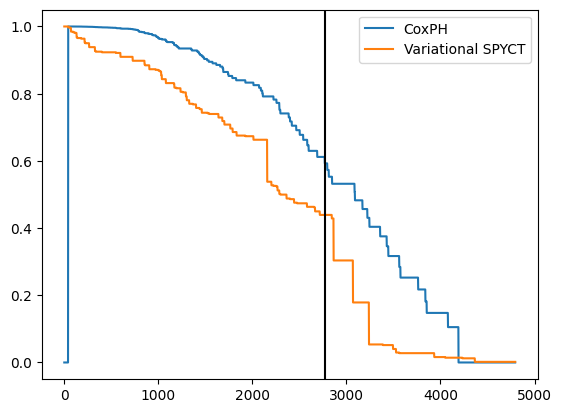

In [22]:
i = 30
plt.plot(transformed_predictions[i], label='CoxPH')
plt.plot(preds[i].mean(axis=0), label='Variational SPYCT')
plt.axvline(T_test[i], color='k')
plt.legend()

In [23]:
bs_test = calculate_bs((transformed_predictions, y_test))

In [24]:
bs_test2 = calculate_bs((preds.mean(axis=1), y_test))

In [25]:
bs_test3 = calculate_bs((preds_spyct, y_test))

In [26]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel

rsf = RandomSurvivalForestModel(num_trees=50)
rsf.fit(X_train, T_train, E_train, max_features="sqrt", max_depth=5)

RandomSurvivalForestModel

In [27]:
predicted_rsf = rsf.predict_survival(X_test)
transformed_predictions_rsf = fix_predictions(predicted_rsf, rsf.times, int(T_train.max()))

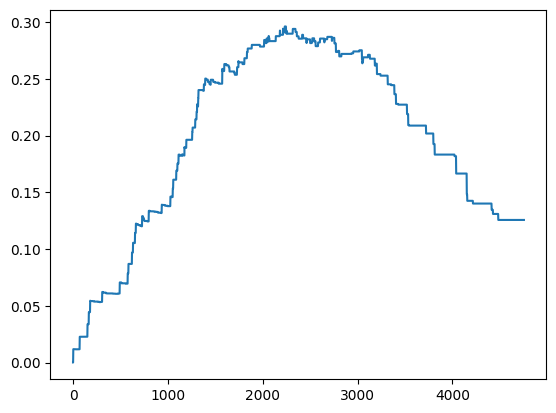

In [61]:
bs_test_rsf = calculate_bs((transformed_predictions_rsf, y_test))
plt.plot(bs_test_rsf[41:], label='Random Survival Forest')

In [62]:
from pysurvival.models.multi_task import LinearMultiTaskModel

In [66]:
mtlr = LinearMultiTaskModel()
mtlr.fit(X_train, T_train, E_train, lr=0.0001, l2_reg=1e-2, init_method='zeros')

% Completion: 100%|***********************************************|Loss:  38.03


LinearMultiTaskModel

In [73]:
predicted_mtlr = mtlr.predict_survival(X_test)
transformed_predictions_mtlr = fix_predictions(predicted_mtlr, mtlr.times, int(T_train.max()))
for i in range(transformed_predictions_mtlr.shape[0]):
    for j in range(transformed_predictions_mtlr.shape[1]):
        if transformed_predictions_mtlr[i, j] < 0:
            transformed_predictions_mtlr[i, j] = 0
        if transformed_predictions_mtlr[i, j] > 1:
            transformed_predictions_mtlr[i, j] = 1

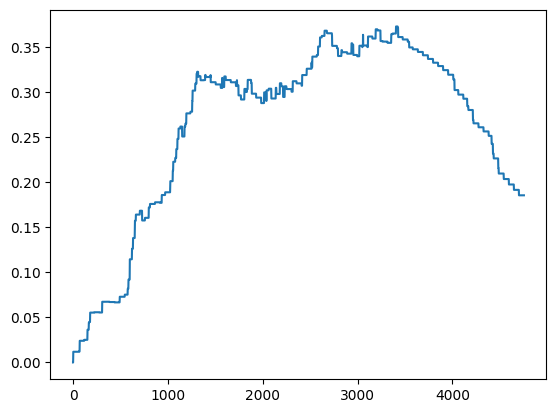

In [74]:
bs_test_mtlr = calculate_bs((transformed_predictions_mtlr, y_test))
plt.plot(bs_test_mtlr[41:], label='Multi-task Linear Regression')

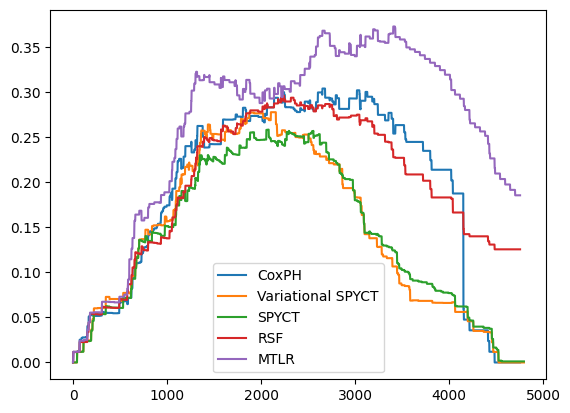

In [75]:
plt.plot(bs_test[41:], label='CoxPH')
plt.plot(bs_test2, label='Variational SPYCT')
plt.plot(bs_test3, label='SPYCT')
plt.plot(bs_test_rsf[41:], label='RSF')
plt.plot(bs_test_mtlr[41:], label='MTLR')
plt.legend()

In [38]:
print(bs_test_rsf[41:].max(),
bs_test[41:].max(),
bs_test2.max(),
bs_test3.max())

0.2962022682302296 0.30426168668191494 0.27796417 0.25860468


In [49]:
from pysurvival.utils.metrics import brier_score
example_bs = brier_score(rsf, X_test, T_test, E_test, t_max=None)
plt.plot(example_bs[1])

325

In [79]:
np.array(example_bs[1]).shape

(325,)

In [87]:
np.expand_dims(example_bs[1], axis=0).shape[1]-1

324

In [90]:
example_bs[1]

[4.698363758397175e-05,
 0.011691126435565158,
 0.011641805042581001,
 0.011629971030033975,
 0.011657219246493766,
 0.011695229783074633,
 0.022621996260493764,
 0.022613568978691156,
 0.022659912764153505,
 0.022691065498774643,
 0.022721514256587486,
 0.02279607602367885,
 0.03376128362831336,
 0.044277441210791815,
 0.054114864166891354,
 0.05386264163013994,
 0.05356858974774874,
 0.05332322851293739,
 0.05324234768751295,
 0.053359384271310796,
 0.05323951855486332,
 0.061296156569466,
 0.06094565442242097,
 0.060803668768502,
 0.06075502010367258,
 0.06067420155673442,
 0.060755781110953005,
 0.06073145890671243,
 0.06036828539513404,
 0.060292152154911294,
 0.060243381739315226,
 0.06037067168231339,
 0.060514717229108145,
 0.08781985642739504,
 0.08777622064118441,
 0.10483234921194458,
 0.10456494622124675,
 0.10455657962327379,
 0.10455312204115215,
 0.10431014453496514,
 0.10399313911465911,
 0.10351586620520034,
 0.11172309402374274,
 0.11112046026946977,
 0.11093602372782

In [55]:
predicted_rsf.shape

(84, 327)

In [59]:
example_bs[1]

[4.698363758397175e-05,
 0.011691126435565158,
 0.011641805042581001,
 0.011629971030033975,
 0.011657219246493766,
 0.011695229783074633,
 0.022621996260493764,
 0.022613568978691156,
 0.022659912764153505,
 0.022691065498774643,
 0.022721514256587486,
 0.02279607602367885,
 0.03376128362831336,
 0.044277441210791815,
 0.054114864166891354,
 0.05386264163013994,
 0.05356858974774874,
 0.05332322851293739,
 0.05324234768751295,
 0.053359384271310796,
 0.05323951855486332,
 0.061296156569466,
 0.06094565442242097,
 0.060803668768502,
 0.06075502010367258,
 0.06067420155673442,
 0.060755781110953005,
 0.06073145890671243,
 0.06036828539513404,
 0.060292152154911294,
 0.060243381739315226,
 0.06037067168231339,
 0.060514717229108145,
 0.08781985642739504,
 0.08777622064118441,
 0.10483234921194458,
 0.10456494622124675,
 0.10455657962327379,
 0.10455312204115215,
 0.10431014453496514,
 0.10399313911465911,
 0.10351586620520034,
 0.11172309402374274,
 0.11112046026946977,
 0.11093602372782